현실 데이터에서 인과 관계를 관찰할 수 있는 연관성 및 상관관계에 대한 기본 규칙에 대해 알아봅니다. 각각의 규칙을 최대한 쉽게 이해할 수 있도록 간단하게 설명한다음 매우 간단한 파이썬 코드를 사용해 어떻게 작동하는지 살펴봅니다. 

먼저 네 가지 기본 인과 관계 구조를 살펴보고 이후에 기본 규칙에 대해서 알아보겠습니다. 실제로 데이터를 분석할때에는 여기서 살펴본 규칙들을 복합적으로 사용해야 합니다. 따라서 인과 관계 추론에 하여 배우려면 [Hernán과 Robins의 책](https://pedermisager.org/blog/seven_basic_rules_for_causal_inference/?utm_source=substack&utm_medium=email#ref-Hernan2020)) 과 HarvardX 의 [인과 관계 다이어그램 과정](https://www.edx.org/learn/data-analysis/harvard-university-causal-diagrams-draw-your-assumptions-before-your-conclusions?index=product&queryID=a52aac6e59e1576c59cb528002b59be0&position=1&linked_from=autocomplete&c=autocomplete)을 배우는 것을 추천드립니다.

# 네 가지 기본 인과 관계 구조

인과 그래프는 변수 간의 인과 메커니즘을 나타내는 그림입니다. 그래프에서 변수 (노드) 는 원 (때로는 사각형) 으로 그려지고, 변수 간의 인과 관계 (경로) 는 원인에서 결과를 가리키는 화살표 (→) 로 그려집니다.

따라서 아무리 복잡한 인과 관계 그래프라도 네 가지 기본 구성 요소로 나눌 수 있습니다. 블록은 변수 간에 추적할 수 있는 경로의 유형에 따라 정의됩니다. 아래에서 설명할 모든 규칙은 이러한 구성 요소 중 하나 이상을 다루므로, 먼저 이러한 구성 요소를 명시하고 설명하는 것이 유용합니다. 주어진 인스턴스에서 어떤 블록을 다루고 있는지 인식하면 어떤 인과 관계 추론 규칙이 적합한지 알 수 있습니다.

## 완전한 독립

A 와 B 사이에는 경로를 추적할 수 없습니다.


```mermaid
flowchart LR
    A~~~B
```

## 2. 체인; Chain

인과 관계 사슬에서 모든 화살표가 A 에서 B 를 가리키는 방향 경로를 추적할 수 있습니다. 사슬 경로는 “열린 경로”라고도 하며, 이러한 유형의 그래프는 A 와 B 사이의 상관 관계를 전달합니다 (규칙 2 참조). 체인에 세 개 이상의 변수가 포함된 경우, A 와 B 를 연결하는 변수 M 을 매개변수라고 부르기도 합니다.


```mermaid
flowchart LR
    A-->B
```

## 3. 포크; Fork

인과관계 포크에서 방향이 없는 경로 (모든 화살표가 같은 방향으로 달리지 않음) 는 공통의 인과관계 조상인 C 를 통해 A 에서 B 로 추적할 수 있으며, C 를 종종 교란 변수라고 부릅니다. 포크 경로는 “개방형”이며 A 와 B 사이의 상관관계를 전달합니다 (규칙 3 참조).

```mermaid
flowchart LR
    C-->A
    C-->B
    A~~~B
```

## 4. 콜라이더; Collider

인과관계 콜라이더에서는 방향이 지정되지 않은 경로 (모든 화살표가 같은 방향으로 달리는 것은 아님) 가 인과관계의 하위 항목 D 를 통해 A 에서 B 로 추적될 수 있으며, D 를 흔히 콜라이더 변수라고 부릅니다. 콜라이더 경로는 “닫힌” 경로이며 A 와 B 사이의 상관관계를 전달하지 않습니다 (규칙 1 참조).

```mermaid
flowchart LR
    A~~~B
    B-->D
    A-->D
```



# 인과 관계 추론의 기본 규칙

## 중요한 가정

- 위의 규칙은 몇 가지 중요한 가정이 충족되는 경우에만 적용되며, 아래에 나열하지만 자세히 설명하지는 않겠습니다
- 허위 상관관계가 없습니다: 상관관계는 무작위적인 우연에 의해 발생하는 것이 아닙니다. 큰 수의 법칙에 따르면 데이터가 많을수록 이 가정은 더 신뢰할 수 있습니다.
- 일관성: 사용자가 보는 A의 값은 A의 실제 값, 즉 비교 대상인 치료의 값이 데이터의 치료 버전과 일치하는 잘 정의된 개입에 해당합니다.
- 교환 가능성: 연구자가 결정하지는 않았지만 모든 치료 가치를 받을 수 있는 조건부 확률은 측정된 공변인에 의해서만 달라집니다.
- 양성: L에 대한 조건부 치료의 모든 값을 받을 확률은 0보다 큰 양수입니다.
- 충실성: 인과 효과는 데이터에서 평균을 0으로 만드는 방식으로 그룹에 따라 달라지지 않습니다. A가 50%는 긍정적인 영향을 미치고 50%는 똑같이 강력한 부정적인 영향을 미치지 않으며, 이 경우 전체 인구에서 평균적으로 0의 영향을 미칩니다.

이러한 가정 중 하나가 충족되지 않으면 이러한 규칙에서 설명하는 인과 효과와 관찰 데이터 간의 관계가 잠재적으로 깨질 수 있습니다.


## 규칙 1: 독립 변수는 상관관계가 없음

```mermaid
flowchart LR
    A~~~B
```

A 와 B 가 인과적으로 독립적이라면 데이터에서 서로 연관되지 않습니다.


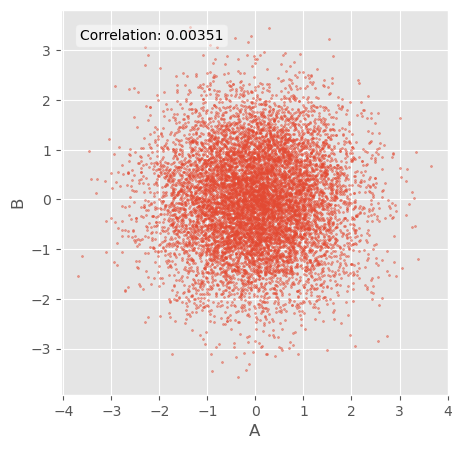

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.style.use("ggplot")

# Rule 1
n = 10000  # Number of data points
a = np.random.normal(0, 1, n)  # A is a random variable
b = np.random.normal(0, 1, n)  # B is a random variable

# Calculate correlation
correlation = np.corrcoef(a, b)[0, 1]

# Create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(a, b, s=2, alpha=0.5)

# Add title and labels
plt.xlabel("A")
plt.ylabel("B")

# Add correlation text to the plot
plt.text(0.05, 0.95, f"Correlation: {correlation:.5f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.show()

```mermaid
flowchart LR
    A~~~B
    B-->D
    A-->D
```

A 와 B 는 인과적 자손 (인과적 충돌자) 을 공유하더라도 인과적으로 독립적이며, D. 공유된 자손의 두 독립적 원인은 서로 상관관계가 없습니다 (규칙 7 은은 제외).

## 규칙 2: 인과적 영향은 상관관계를 생성합니다


```mermaid
flowchart LR
    A-->B
```


A 가 B 의 원인인 경우 또는 B 가 A 의 원인인 경우 데이터에서 A 와 B 는 상관관계가 있습니다.

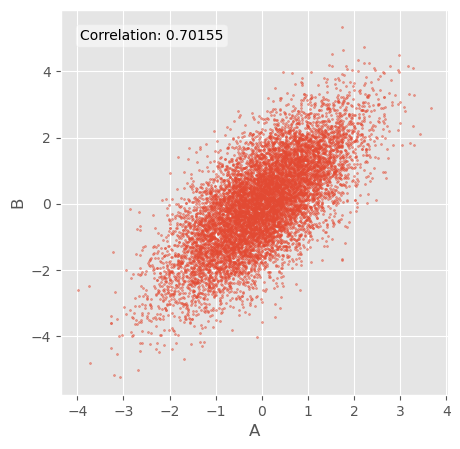

In [16]:
# Rule 2

n = 10000  # Number of data points
a = np.random.normal(0, 1, n)  # A is a random variable
b = a + np.random.normal(0, 1, n)  # B is a random variable

# Calculate correlation
correlation = np.corrcoef(a, b)[0, 1]

# Create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(a, b, s=2, alpha=0.5)

# Add title and labels
plt.xlabel("A")
plt.ylabel("B")

# Add correlation text to the plot
plt.text(0.05, 0.95, f"Correlation: {correlation:.5f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.show()

이런 인과관계는 A가 M을 유발하고 M이 다시 B를 유발하는 (중계하는)경우에도 적용됩니다.

```mermaid
flowchart LR
    A-->M
    M-->B

```

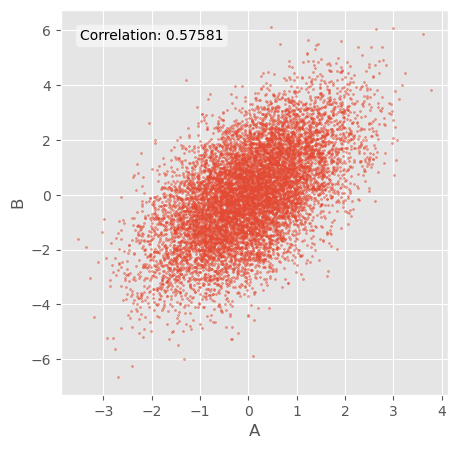

In [17]:
# Rule 2 (mediation)

n = 10000  # Number of data points
a = np.random.normal(0, 1, n)  # A is a random variable
m = a + np.random.normal(0, 1, n) # M is a function of A
b = m + np.random.normal(0, 1, n)  # B is a function of M

# Calculate correlation
correlation = np.corrcoef(a, b)[0, 1]

# Create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(a, b, s=2, alpha=0.5)

# Add title and labels
plt.xlabel("A")
plt.ylabel("B")

# Add correlation text to the plot
plt.text(0.05, 0.95, f"Correlation: {correlation:.5f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.show()

## 규칙 3: 교락은 상관 관계를 만듭니다.

A와 B가 공통 조상 C(인과적 포크)를 공유하는 경우, A와 B는 데이터에서 상관관계가 생깁니다. 이러한 현상을 흔히 교락 또는 '제3의 변수 문제'라고 합니다.


```mermaid
flowchart LR
    C-->A
    A~~~B
    C-->B

```

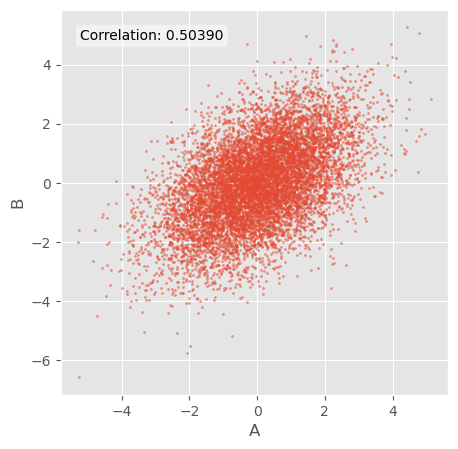

In [18]:
# Rule 3
n = 10000  # Number of data points
c = np.random.normal(0, 1, n)  #  C is a random variable
a = c + np.random.normal(0, 1, n) # A is a function of C
b = c + np.random.normal(0, 1, n)  # B is a function of C

# Calculate correlation
correlation = np.corrcoef(a, b)[0, 1]

# Create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(a, b, s=2, alpha=0.5)

# Add title and labels
plt.xlabel("A")
plt.ylabel("B")

# Add correlation text to the plot
plt.text(0.05, 0.95, f"Correlation: {correlation:.5f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.show()

이 규칙은 C가 A 또는 B에 미치는 영향이 다른 변수를 통해 매개되는 경우에도 적용됩니다.

```mermaid
flowchart LR
    C-->M
    M-->A
    A~~~N
    C-->N
    N-->B

```

## 규칙 4: 무작위 조작은 인과적 영향으로부터 변수를 보호합니다.

A가 조작 변수인 무작위 대조 실험에서처럼 A의 값을 무작위로 할당할 수 있는 경우 다른 변수가 A에 영향을 줄 수 없습니다.

```mermaid
flowchart LR
    C1--xA["do(A)"]
    C2--xA
    C3--xA

```

do(A) 표기는 A의 값을 무작위화하는 것을 의미합니다. 달리 말하면, 완전한 실험 통제와 무작위화를 통해 어떤 변수도 A의 값에 영향을 미치지 못하도록 하는 것입니다.


## 규칙 5: 교란 요인에 대한 통제는 해당 교란 요인으로 인해 발생하는 상관관계를 차단합니다.

A와 B가 공통 조상 C(인과적 포크)를 공유하는 경우, C를 제어하면 C에 의해 생성된 A와 B 간의 교란 상관관계(규칙 3)가 제거됩니다.

```mermaid
flowchart LR
    C{"if(C)"}-->A
    A~~~B
    C-->B
```

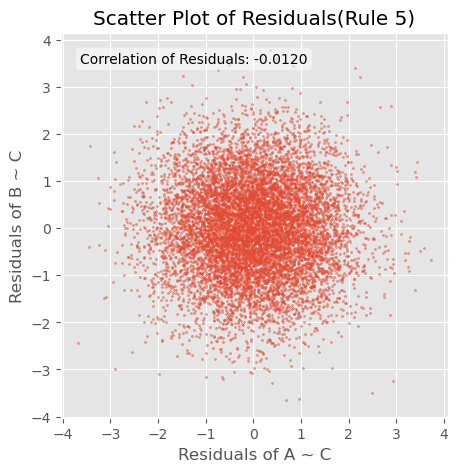

In [19]:
# Rule 5
n = 10000  # Number of data points
c = np.random.normal(0, 1, n)  # C is a random variable
a = c + np.random.normal(0, 1, n)  # A is a function of C
b = c + np.random.normal(0, 1, n)  # B is a function of C

# Perform linear regression
slope_a, intercept_a, _, _, _ = stats.linregress(c, a)
slope_b, intercept_b, _, _, _ = stats.linregress(c, b)

# Calculate residuals
residuals_a = a - (slope_a * c + intercept_a)
residuals_b = b - (slope_b * c + intercept_b)

# Create scatter plot of residuals
plt.figure(figsize=(5, 5))
plt.scatter(residuals_a, residuals_b, s=2, alpha=0.5)
plt.title("Scatter Plot of Residuals(Rule 5)")
plt.xlabel("Residuals of A ~ C")
plt.ylabel("Residuals of B ~ C")

# Calculate and display correlation of residuals
correlation = np.corrcoef(residuals_a, residuals_b)[0, 1]
plt.text(0.05, 0.95, f"Correlation of Residuals: {correlation:.4f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.show()

## 규칙 6: 매개자를 통제하면 매개된 인과 효과로 인해 발생하는 상관관계가 차단됩니다.

```mermaid
flowchart LR
    A-->M
    M-->B 
```

A가 M의 원인이고 M이 B의 원인인 경우, M을 통제하면 매개 인과 효과(규칙 2)에 의해 생성된 A와 B 간의 상관관계가 제거됩니다.

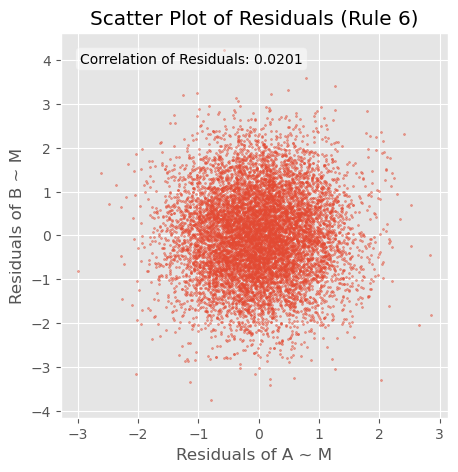

In [20]:
# Rule 6
n = 10000  # Number of data points
a = np.random.normal(0, 1, n)  # A is a random variable
m = a + np.random.normal(0, 1, n)  # M is a function of A
b = m + np.random.normal(0, 1, n)  # B is a function of M

# Perform linear regression
slope_a, intercept_a, _, _, _ = stats.linregress(m, a)
slope_b, intercept_b, _, _, _ = stats.linregress(m, b)

# Calculate residuals
residuals_a = a - (slope_a * m + intercept_a)
residuals_b = b - (slope_b * m + intercept_b)

# Create scatter plot of residuals
plt.figure(figsize=(5, 5))
plt.scatter(residuals_a, residuals_b, s=2, alpha=0.5)
plt.title("Scatter Plot of Residuals (Rule 6)")
plt.xlabel("Residuals of A ~ M")
plt.ylabel("Residuals of B ~ M")

# Calculate and display correlation of residuals
correlation = np.corrcoef(residuals_a, residuals_b)[0, 1]
plt.text(0.05, 0.95, f"Correlation of Residuals: {correlation:.4f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.grid(True)
plt.show()

## 규칙 7: 콜라이더를 제어하면 상관 관계로 이어짐


```mermaid
flowchart LR
    A~~~B
    B-->D
    A-->D 
```

A와 B가 인과 관계의 하위 항목(콜라이더) D를 공유하고 D를 제어하면 데이터에서 A와 B가 상관 관계를 갖게 됩니다. 이를 흔히 “콜라이더에 대한 조건부” 또는 콜라이더 편향이라고 합니다.

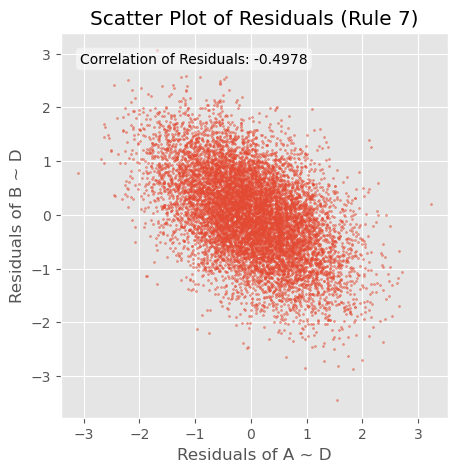

In [21]:
# Rule 7
n = 10000  # Number of data points
a = np.random.normal(0, 1, n)  # A is a random variable
b = np.random.normal(0, 1, n)  # B is a random variable
d = a + b + np.random.normal(0, 1, n)  # D is a function of A and B

# Perform linear regression
slope_a, intercept_a, _, _, _ = stats.linregress(d, a)
slope_b, intercept_b, _, _, _ = stats.linregress(d, b)

# Calculate residuals
residuals_a = a - (slope_a * d + intercept_a)
residuals_b = b - (slope_b * d + intercept_b)

# Create scatter plot of residuals
plt.figure(figsize=(5, 5))
plt.scatter(residuals_a, residuals_b, s=2, alpha=0.5)
plt.title("Scatter Plot of Residuals (Rule 7)")
plt.xlabel("Residuals of A ~ D")
plt.ylabel("Residuals of B ~ D")

# Calculate and display correlation of residuals
correlation = np.corrcoef(residuals_a, residuals_b)[0, 1]
plt.text(0.05, 0.95, f"Correlation of Residuals: {correlation:.4f}", 
         transform=plt.gca().transAxes, 
         verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.grid(True)
plt.show()

## 규칙 8: 인과 관계에 있는 자손에 대한 제어는 조상에 대한 (부분적) 제어입니다.

B가 A의 자손이고 B가 제어되는 경우, A도 (부분적으로) 제어됩니다.

```mermaid
flowchart LR
    A-->B
```

B를 통제할 때 A를 통제하는 정도는 일반적으로 A가 B를 얼마나 확실하게 유발하는지에 따라 달라집니다.

아래 예에서 C는 A와 B의 교란 변수이지만 CM을 통제하면 교란 영향을 부분적으로 차단할 수 있습니다.

```mermaid
flowchart LR
    C-->A
    A~~~B
    C-->B
    C-->D["CM"]
```

CM이 C의 약간 신뢰할 수 있는 측정값인 경우 CM을 통제하면 A와 B 간의 상관관계가 일부 제거되지만 C를 통제할 때만큼은 아닙니다:

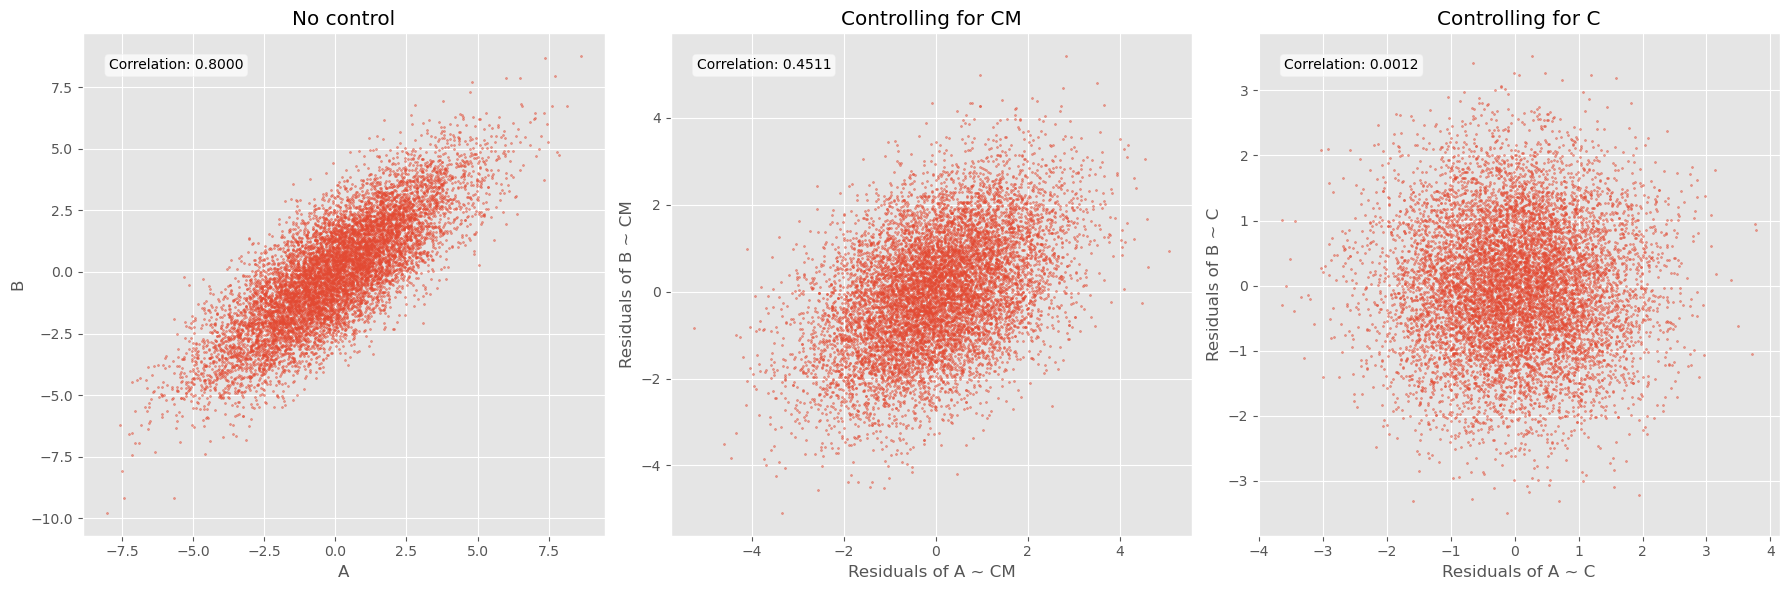

In [22]:
# Rule ?
n = 10000  # Number of data points
c = np.random.normal(0, 1, n)  # C is a random variable
a = 2*c + np.random.normal(0, 1, n)  # A is a function of C
b = 2*c + np.random.normal(0, 1, n)  # B is a function of C
cm = 2*c + np.random.normal(0, 1, n)  # CM is a function of C

# Perform linear regressions
slope_ac, intercept_ac, _, _, _ = stats.linregress(c, a)
slope_bc, intercept_bc, _, _, _ = stats.linregress(c, b)
slope_acm, intercept_acm, _, _, _ = stats.linregress(cm, a)
slope_bcm, intercept_bcm, _, _, _ = stats.linregress(cm, b)

# Calculate residuals
residuals_ac = a - (slope_ac * c + intercept_ac)
residuals_bc = b - (slope_bc * c + intercept_bc)
residuals_acm = a - (slope_acm * cm + intercept_acm)
residuals_bcm = b - (slope_bcm * cm + intercept_bcm)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Function to add correlation text to plot
def add_correlation_text(ax, x, y):
    corr = np.corrcoef(x, y)[0, 1]
    ax.text(0.05, 0.95, f"Correlation: {corr:.4f}", 
            transform=ax.transAxes, 
            verticalalignment="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

# Plot 1: No control
ax1.scatter(a, b, s=2, alpha=0.5)
ax1.set_title("No control")
ax1.set_xlabel("A")
ax1.set_ylabel("B")
add_correlation_text(ax1, a, b)

# Plot 2: Controlling for CM
ax2.scatter(residuals_acm, residuals_bcm, s=2, alpha=0.5)
ax2.set_title("Controlling for CM")
ax2.set_xlabel("Residuals of A ~ CM")
ax2.set_ylabel("Residuals of B ~ CM")
add_correlation_text(ax2, residuals_acm, residuals_bcm)

# Plot 3: Controlling for C
ax3.scatter(residuals_ac, residuals_bc, s=2, alpha=0.5)
ax3.set_title("Controlling for C")
ax3.set_xlabel("Residuals of A ~ C")
ax3.set_ylabel("Residuals of B ~ C")
add_correlation_text(ax3, residuals_ac, residuals_bc)

# Adjust layout and display
plt.tight_layout()
plt.show()

:::{callout-note}

상관관계가 반드시 선형적 상관관계를 의미하는 것은 아닙니다.

이 글에서는 “상관관계”라는 용어를 많이 사용합니다. 많은 사람들에게 상관관계라는 용어는 선형적 상관관계와 동의어입니다. 하지만 제가 의미하는 바는 그렇지 않습니다. 여기서 “상관관계”는 단순히 “상호 관계”, “연관성” 또는 “상호 정보”를 의미합니다. A와 B가 상관관계가 있다는 것은 A에 어떤 일이 발생하면 B에도 체계적으로 어떤 일이 발생한다는 의미일 뿐입니다.

예를 들어, 규칙 2는 A가 B를 유발할 때 A와 B가 선형적으로 상관관계가 있다는 것을 의미하는 것이 아니라, A가 변하면 B가 어떤 식으로든 체계적으로 변한다는 것을 의미합니다.

간단하게 설명하기 위해 모든 예제 R 코드에서 선형 상관관계를 사용했습니다. 그러나 실제 생활에서 우리가 기대하는 상관 관계/연관 관계/상호 정보의 패턴은 전적으로 관련된 인과 관계의 기능적 형태에 따라 달라집니다.

:::

# References

- Hernán, Miguel, and James Robins. 2020. Causal Inference: What If. Boca Raton: Chapman & Hall/CRC.
- https://pedermisager.org/blog/seven_basic_rules_for_causal_inference/?utm_source=substack&utm_medium=email